In [15]:
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams["font.sans-serif"]=["SimHei"]
mpl.rcParams["axes.unicode_minus"]=False
from selenium import webdriver
from  time import sleep
import pandas as pd
import json
from  random import random
import re

# 1.网页读取编码出错，中文乱码-解决

In [16]:
df = pd.read_csv('./baseline_extract.csv')
df
df['url'][3]

'http://news.gxnews.com.cn/staticpages/20200209/newgx5e3f4bbc-19247534-3.shtml'

In [17]:
r = requests.get('http://news.gxnews.com.cn/staticpages/20200209/newgx5e3f4bbc-19247534-3.shtml')
r.encoding= r.apparent_encoding
print(r.text)

<!DOCTYPE html>
<html>
<head>
<meta charset="GBK" />
<meta http-equiv="Content-Type" content="text/html; charset=GBK" />
<title>2月8日广西新增确诊病例12例 新增死亡病例1例-广西新闻网</title>
<meta name="keywords" content="2月,8日,广西,新增,确诊,病例,12例" />
<meta name="description" content="其中南宁市3例、北海市1例、河池市4例、来宾市4例。" />
<link rel="canonical" location="19247526" href="http://www.gxnews.com.cn/staticpages/20200209/newgx5e3f4bbc-19247527.shtml" /> 
<meta name="thumbnail" content="https://image.gxnews.com.cn/littlepic/2020/02/09/5896f6427ce871fb791f773777300edd.jpg" />
<meta name="renderer"  content="webkit" />
<meta name="SiteName" content="广西新闻网" />
<meta name="SiteDomain" content="www.gxnews.com.cn" />
<meta name="SiteIDCode" content="桂B2-20040022-10" />
<meta name="ArticleTitle" content="2月8日广西新增确诊病例12例 新增死亡病例1例" />  
<meta name="ColumnName" content="新闻中心全媒体播报・要闻" />
<meta name="ColumnType" content="广西新闻" />
<meta name="PubDate" content="2020-02-09 08:01" />  
<meta name="ContentSource" content="自治区卫生健康委员会" />
<base t

In [18]:
for u in df['url']:
    r = requests.get(u)
    r.encoding= r.apparent_encoding
    soup = BeautifulSoup(r.text, features="html.parser")
    for script in soup(["script", "style"]):
        script.decompose()
    text = soup.get_text()
    print('\r' + text, end='', flush=True)





































            参数错误            




微信公众平台运营中心












Domain Not Resolved[D]Domain Not Resolved|lookup hc.nc.gov.cn: getaddrinfow: This is usually a temporary error during hostname resolution and means that the local server did not receive a response from an authoritative server.




淮安经济技术开发区肺炎疫情+确诊人数（持续更新）- 淮安本地宝



















 







淮安




资讯 旅游 交通 指南 休闲 购物 美食 教育 人才 节日 二手房 租房 专题 网点 景点 公交 客车 地图天气推荐






资讯 动态 正文

淮安经济技术开发区肺炎疫情+确诊人数（持续更新）

2020-02-12 15:12
淮安网


导语 截止到2020年2月11日，淮安经济技术开发区确诊病例共2例。以下是其详细情况：

	　　更新时间：2020年2月11日24时


	　　1、男，49岁，现住淮安经济技术开发区大湖城邦小区，无湖北居住史和旅行史。1月20日在淮安区浅深浴室洗浴，下午与我市一名确诊患者有接触；1月27日自觉不适；1月29日晚出现发热、咳嗽症状；1月31日至2月3日驾车前往淮阴区一私人诊所输液治疗；2月4日下午驾车前往淮阴区营中社区卫生服务中心就诊，后转至淮安市淮阴医院，入院隔离观察治疗；2月5日转至淮安市第四人民医院；2月7日被确诊为新型冠状病毒感染的肺炎。


	　　2、男，52岁，现住淮安经济技术开发区东方凯旋城小区，无湖北居住史和旅行史，与我市一确诊患者打过牌，系密切接触者。1月29日出现头痛、咳嗽、发热等症状，至淮安市第二人民医院就诊，口服药物治疗；1月30日自觉症状未缓解，至淮安市第一人民医院就诊，1月31日晚接受输液治疗，至2月1日凌晨回家，在家休息一天；2月2日上午再次发烧，至清江浦区钵池山社区卫生服务中心就诊，服药治疗；2月3日至5日在淮安市第一人民医院输

From cffi callback <function _verify_callback at 0x0000028D62CD3318>:
Traceback (most recent call last):
  File "E:\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 306, in wrapper
    @wraps(callback)
KeyboardInterrupt


SSLError: HTTPSConnectionPool(host='mp.weixin.qq.com', port=443): Max retries exceeded with url: /s/99IBrH7yBT2bi_k6CXWk1A (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

# 2.微信参数错误- 解决，链接带空格

In [19]:
df['url'][0]

' https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA '

In [23]:
r = requests.get('https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA')

In [24]:
r.encoding= r.apparent_encoding

'<!DOCTYPE html>\n<html class="\n\n">\n    <head>\n                        <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="color-scheme" content="light dark">\n<meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=1.0,user-scalable=0,viewport-fit=cover">\n<link rel="shortcut icon" type="image/x-icon" href="//res.wx.qq.com/a/wx_fed/assets/res/NTI4MWU5.ico">\n<link rel="mask-icon" href="//res.wx.qq.com/a/wx_fed/assets/res/MjliNWVm.svg" color="#4C4C4C">\n<link rel="apple-touch-icon-precomposed" href="//res.wx.qq.com/a/wx_fed/assets/res/OTE0YTAw.png">\n<meta name="apple-mobile-web-app-capable" content="yes">\n<meta name="apple-mobile-web-app-status-bar-style" content="black">\n<meta name="format-detection" content="telephone=no">\n\n\n        \n\n  \n  <meta name="description" content="最新疫情通报" />\n  <meta name="author" content="" />\n\n  \n  <meta property="og:title" content=
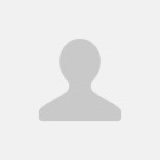
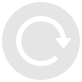
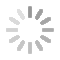
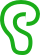
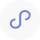
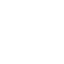
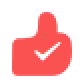
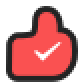
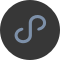

In [25]:
r.text

In [27]:
df['url_fix'] = df['url'].apply(lambda x: x.replace(' ',''))

In [29]:
df['url_fix'][0]

'https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA'

# 3.公众号文章爬不到ｔｉｔｌｅ

In [ ]:
r = requests.get('https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA')
r.encoding= r.apparent_encoding
r.text

## 4.badurl处理

In [ ]:
if r.status_code != requests.codes.ok:
    #do something     